In [ ]:
#Makes time series graphs for precipitation metrics


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
from geopy.distance import great_circle
from scipy.stats.stats import pearsonr

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:

station = 'USW00014939'   

#change to file on shiva?
filename = '/Users/rphinney/Documents/Hollings/ghcnd_all/'+station+'.dly'
file = open(filename, 'r')


 LINCOLN MUNI AP              
21916
21696


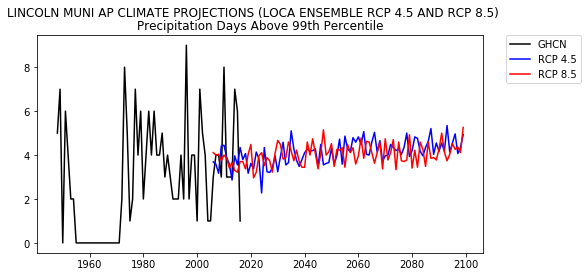

In [4]:

    
#Using ghcnd-stations.txt get the station information

#change to file on shiva?
path = '/Users/rphinney/Documents/Hollings/ghcnd-stations.txt'

station_file = open(path)
ghcnd = []

for x in station_file:
    ghcnd.append(x)

for each_line in ghcnd:   
    if each_line[0:11] == station:
        station_name = each_line[40:70]
        station_state = each_line[38:40]
        latitude = each_line[13:20]
        longitude = each_line[21:31]
        elevation = each_line[32:38]
        station_name.strip()
        print(station_name)
            
                      
#------------------------------------------------------------------
#Open the LOCA ensemble file and match the station to the nearest grid


file45 = '/Users/rphinney/Documents/Hollings/pr-days-above-99th/rcp45/ensemble.nc'
file85 = '/Users/rphinney/Documents/Hollings/pr-days-above-99th/rcp85/ensemble.nc'

data45 = Dataset(file45)
data85 = Dataset(file85)
    
lon = data45.variables['lon'][:]
lat = data45.variables['lat'][:]
prcp = data45.variables['pr_days_above_99th'][:]
prcp2 = data85.variables['pr_days_above_99th'][:]

            
station_loc = (latitude,longitude)
min_loc = 9999
    
for lons in lon:
    for lats in lat:
        check_loc = (lats,lons)
        b = int(great_circle(station_loc,check_loc).miles)
        if b < min_loc:
            min_loc = b
            min_lat = lats
            min_lon = lons-360

#y = np.arange(1950,2014)           
prcpa = []
prcpb = []
lon_count = -1
lat_count = -1
for lons in lon:
    lon_count = lon_count +1
    if lons == min_lon+360:
        for lats in lat:
            lat_count = lat_count + 1
            if lats == min_lat:
                for x in range (0,94):
                    prcp45 = prcp[x,lat_count,lon_count]
                    prcpa.append(prcp45)
                    prcp85 = prcp2[x,lat_count,lon_count]
                    prcpb.append(prcp85)
    


#---------------------------------------------------------------------------
#find the days above the 99th percentile from the GHCN station

begin_year = 1980
end_year = 2010

mylist = []

for line in file:
    mylist.append(line)

daymax = []
all_prcp = []
for year in range(1980,2010):
    year_prcp = []
    for line in mylist:
        if int(line[11:15]) == year:
            if line[17:21] == 'PRCP':
                year_prcp.append(line)

    new_prcp = []
    trace = []
    for data in year_prcp:
        char1 = 22
        char2 = 26
        while char1 != 270:
            if data[char1:char2] == '9999':
                char1 = char1 + 8
                char2 = char2 + 8
            else:
                prcp = (.003937*int(data[char1:char2]))      #convert to inches
                all_prcp.append(prcp)
                char1 = char1 + 8
                char2 = char2 + 8
all_prcp.extend(all_prcp)

# sort the data from smallest value to largest
all_prcp = sorted(all_prcp)

#find the percentile location
n_elements = size(all_prcp)
print(n_elements)

#Variable can be changed depending on which percentile is being used
percentile = .99

loc = int(percentile*n_elements)
print(loc)

# find the precipitation value at the percentile location
RRwn = (all_prcp[loc])


#find the number of days in which the precipitation amount was greater than the 99th percentile for a given year
#find the annual amount of precipitation when the daily amount is greater than the 99th percentile

days = []
annual = []

#range of years  ***add code to find this automatically
#find the first year

#find the beginning year of the file
for first in mylist:
    if first[17:21] == "PRCP":
        min_year = int(first[11:15])
        break
max_year = 2017

for year in range(min_year,max_year):
    year_prcp = []
    for line in mylist:
        if int(line[11:15]) == year:
            if line[17:21] == 'PRCP':
                year_prcp.append(line)

    new_prcp = []
    for data in year_prcp:
        char1 = 22
        char2 = 26
        while char1 != 270:
            if data[char1:char2] == '9999':
                char1 = char1 + 8
                char2 = char2 + 8
            else:
                prcp = (.003937*int(data[char1:char2])) 
                new_prcp.append(prcp)
                char1 = char1 + 8
                char2 = char2 + 8

    day_count = 0  
    annprcp = 0
    for one in new_prcp:
        if one > RRwn:
            day_count = 1 + day_count
            annprcp = one + annprcp


    days.append(day_count)
    annual.append(annprcp)

x = np.arange(min_year,2017) 
            


        
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

a = np.arange(2006,2100)
plt.figure(figsize(8,4))
plt.plot(x,days, color = 'black', label = 'GHCN')
plt.plot(a,prcpb,color = 'blue', label = 'RCP 4.5')
plt.plot(a,prcpa, color = 'red', label = 'RCP 8.5')


plt.title('Precipitation Days Above 99th Percentile')
plt.suptitle(station_name.strip() + ' CLIMATE PROJECTIONS (LOCA ENSEMBLE RCP 4.5 AND RCP 8.5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#savefig()